## Problem Statement 

You need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others 


With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.

## Pipelines that needs to be performed:

You need to perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling 

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

## Importing the necessary libraries

In [7]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [8]:
# Opening JSON file 
# Use Open Command to load the complaints.json file to a variable
complaint_file = open('complaints.json')# Write the path to your data file and load it 
  
# returns JSON object as  
# a dictionary 
data = json.load(complaint_file)
complaint_df =pd.json_normalize(data)

In [9]:
#Just print the first 10 lines of the complaint datafrane
complaint_df.head(10)

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A
5,complaint-public-v2,complaint,3275312,0.0,Older American,48227,3275312,Managing an account,2019-06-13T12:00:00-05:00,MI,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Referral,2019-06-14T12:00:00-05:00,None,Checking account,Yes,,Problem using a debit or ATM card,N/A
6,complaint-public-v2,complaint,3238804,0.0,None,76262,3238804,Managing an account,2019-05-10T12:00:00-05:00,TX,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Phone,2019-05-10T12:00:00-05:00,None,Checking account,Yes,,Problem using a debit or ATM card,N/A
7,complaint-public-v2,complaint,3249272,0.0,None,07753,3249272,Trouble during payment process,2019-05-15T12:00:00-05:00,NJ,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-05-21T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,N/A
8,complaint-public-v2,complaint,3351653,0.0,None,60621,3351653,Closing an account,2019-08-22T12:00:00-05:00,IL,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-08-23T12:00:00-05:00,None,Checking account,Yes,,Company closed your account,N/A
9,complaint-public-v2,complaint,3273612,0.0,None,99354,3273612,Managing an account,2019-06-11T12:00:00-05:00,WA,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Referral,2019-06-17T12:00:00-05:00,None,Checking account,Yes,,Cashing a check,N/A


## Data preparation

In [10]:
# Inspect the dataframe to understand the given data.
# Display the column names and their corresponding data types using info command
complaint_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [11]:
#print the column names
# Use the columns attribute of the dataframe to print the content
complaint_df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [12]:
#Assign new column names
# We are rewriting the column names for the columns as some of them are too big and the naming conventions were like 
# that of JSON
complaint_df.columns = ['index', 'type', 'id', 'score', 'tags', 'zip_code','complaint_id', 'issue', 'date_received',
       'state', 'cons_disputed', 'product','comp_resp', 'company', 'submitted_via',
       'date_sent_to_company', 'comp_pub_resp','sub_product', 'timely',
       'complaint_what_hpnd', 'sub_issue','cons_consent_provided']

In [13]:
#Finding the columns where complains are blank
complaint_df[complaint_df.loc[:, 'complaint_what_hpnd'] == ''] 

,index,type,id,score,tags,zip_code,complaint_id,issue,date_received,state,...,comp_resp,company,submitted_via,date_sent_to_company,comp_pub_resp,sub_product,timely,complaint_what_hpnd,sub_issue,cons_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A
5,complaint-public-v2,complaint,3275312,0.0,Older American,48227,3275312,Managing an account,2019-06-13T12:00:00-05:00,MI,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Referral,2019-06-14T12:00:00-05:00,None,Checking account,Yes,,Problem using a debit or ATM card,N/A
6,complaint-public-v2,complaint,3238804,0.0,None,76262,3238804,Managing an account,2019-05-10T12:00:00-05:00,TX,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Phone,2019-05-10T12:00:00-05:00,None,Checking account,Yes,,Problem using a debit or ATM card,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78304,complaint-public-v2,complaint,3080086,0.0,None,76107,3080086,Applying for a mortgage or refinancing an exis...,2018-11-22T12:00:00-05:00,TX,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Web,2018-11-22T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Other
78305,complaint-public-v2,complaint,3103013,0.0,Older American,863XX,3103013,Closing an account,2018-12-17T12:00:00-05:00,AZ,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2018-12-18T12:00:00-05:00,None,Other banking product or service,Yes,,Funds not received from closed account,Consent not provided
78306,complaint-public-v2,complaint,3099437,0.0,None,11217,3099437,Managing an account,2018-12-12T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2018-12-18T12:00:00-05:00,None,Checking account,Yes,,Deposits and withdrawals,N/A
78307,complaint-public-v2,complaint,3156336,0.0,None,074XX,3156336,Applying for a mortgage or refinancing an exis...,2019-02-19T12:00:00-05:00,NJ,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-02-19T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Other


In [14]:
#Assign nan in place of blanks in the complaints column
# If the column contains blank value, replace it with NAN.
complaint_df[complaint_df.loc[:, 'complaint_what_hpnd'] == '']  = np.nan

In [15]:
#Print the shape of the dataframe to find the number of rows and columns
complaint_df.shape

(78313, 22)

In [16]:
# Remove all rows where complaints column is nan

complaint_df = complaint_df[~complaint_df['complaint_what_hpnd'].isnull()]

In [17]:
#Print the shape, that is the number of rows and columns of complaint dataframe after removing the value
complaint_df.shape

(21072, 22)

In [18]:
regex_for_punctuation = '[^\w\s]'
regex_for_numbers_words = '\w*\d\w*'

## Prepare the text for topic modeling

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Extract the POS tags of the lemmatized text and remove all the words which have tags other than NN[tag == "NN"].


In [19]:
# Write your function here to clean the text and remove all the unnecessary elements.
def remove_unnecessary_elements(sentance):
    #Removing the words that have punctuation
    sentance = re.sub(regex_for_punctuation, '', sentance) 
    #Removing the words that have numbers inbetween words
    sentance = re.sub(regex_for_numbers_words, '', sentance) 
    return sentance



In [20]:
#Write your function to Lemmatize the texts
def lemmmatize_sentance(complaint_text):
    sentance = []
    #Call the NLP library
    complaint_lemma_results = nlp(complaint_text)
    #Iterate the data and find the list of lemma words
    for tok in complaint_lemma_results:
        sentance.append(tok.lemma_)
    #Convert the lemma words to a large sentance in the text.
    return " ".join(sentance)

In [21]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
df_clean = pd.DataFrame(complaint_df['complaint_what_hpnd'].str.lower().apply(remove_unnecessary_elements))
df_clean['complaint_lemmatized'] = df_clean['complaint_what_hpnd'].apply(lemmmatize_sentance)

In [22]:
df_clean

,complaint_what_hpnd,complaint_lemmatized
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...
2,i upgraded my xxxx xxxx card in and was told ...,I upgrade my xxxx xxxx card in and be tell b...
10,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...
11,on while trying to book a xxxx xxxx ticket ...,on while try to book a xxxx xxxx ticket ...
14,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...
...,...,...
78303,after being a chase card customer for well ove...,after be a chase card customer for well over a...
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,on wednesday xxxxxxxx I call chas my xxxx xxxx...
78310,i am not familiar with xxxx pay and did not un...,I be not familiar with xxxx pay and do not und...
78311,i have had flawless credit for yrs ive had ch...,I have have flawless credit for yrs I ve hav...


In [23]:
!pip install textblob
from textblob import TextBlob

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jagannathan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jagannathan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [24]:
#Write your function to extract the POS tags 

def pos_tag(complaint):
    sentence = []
    blob = TextBlob(complaint)
    # Find the list of tags of every blob.
    for (w,t) in blob.tags:
        # If the tag is NN, append the word to the array
        if (t == 'NN'):
            sentence.append(w)
    #return the single largest sentance
    return " ".join(sentence)


#Create a new column that contains the words that has POS tag removed
df_clean["complaint_POS_removed"] =  df_clean['complaint_lemmatized'].apply(pos_tag)


In [25]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_clean

,complaint_what_hpnd,complaint_lemmatized,complaint_POS_removed
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember service ask ...
2,i upgraded my xxxx xxxx card in and was told ...,I upgrade my xxxx xxxx card in and be tell b...,card agent upgrade date agent information orde...
10,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...,card report application identity consent servi...
11,on while trying to book a xxxx xxxx ticket ...,on while try to book a xxxx xxxx ticket ...,try book xxxx ticket offer ticket card informa...
14,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund bank account pay money ...
...,...,...,...
78303,after being a chase card customer for well ove...,after be a chase card customer for well over a...,card customer decade solicitation credit card ...
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,on wednesday xxxxxxxx I call chas my xxxx xxxx...,visa credit card provider claim purchase prote...
78310,i am not familiar with xxxx pay and did not un...,I be not familiar with xxxx pay and do not und...,pay risk provide consumer bank app chase year ...
78311,i have had flawless credit for yrs ive had ch...,I have have flawless credit for yrs I ve hav...,credit yrs credit card chase freedom xxxx prob...


## Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




In [26]:

import matplotlib.pyplot as plt



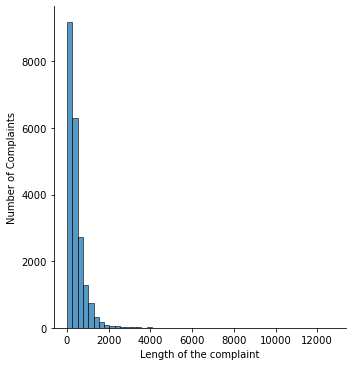

In [28]:
# Write your code here to visualise the data according to the 'Complaint' character length
complaint_length = []
#Prepare the complaint length array by finding the length of the sentance.
for sentence in df_clean['complaint_POS_removed']:
    complaint_length.append(len(sentence))
#Draw a histogram with bins as 50 
sns.displot(complaint_length, kind='hist', bins=50)
#Setting X and Y axis.
plt.xlabel("Length of the complaint")
plt.ylabel("Number of Complaints")
#Plotting the histogram
plt.show()


#### Find the top 40 words by frequency among all the articles after processing the text.

In [29]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

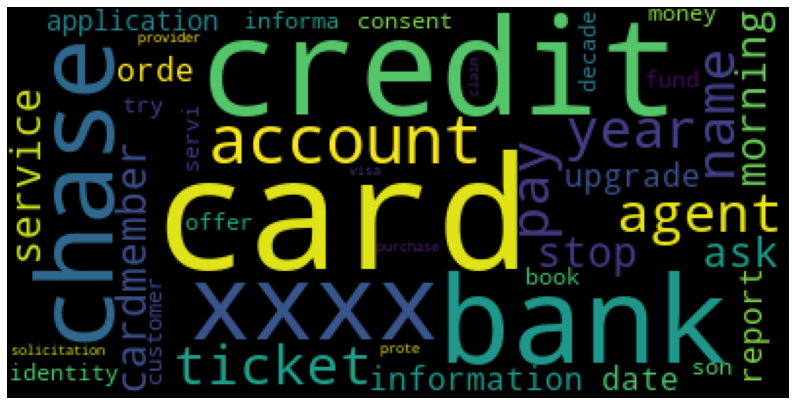

In [30]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
stop_words = set(STOPWORDS)
#Prepare a word cloud. 
# max_words is 40 aas we need to find the top 40 words by frequency.
# setting the background as black to make it beautiful.
words = WordCloud(stopwords=stop_words, max_words=40, background_color="black", max_font_size=80, random_state=100 
            ).generate(str(df_clean['complaint_POS_removed']))
plt.figure(figsize=[14,14])
#show the words
plt.imshow(words)
#We are disabling axis as the plot does not need x and y axis.
plt.axis("off")
plt.show()

In [31]:
#Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')

#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [32]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 
data = df_clean['Complaint_clean'].values.astype('U')
frequency_of_words = []
# Pass the ngram vector as (1,1) to the count vector as we are looking for unigram
count_vector = CountVectorizer(stop_words='english', ngram_range=(1,1)).fit(data)
# Find the bag of words
bag_of_words = count_vector.transform(data)
sum_words = bag_of_words.sum(axis=0)
# Find the frequency of words and store them as a pair within the list 
for (w,i) in count_vector.vocabulary_.items():
    frequency_of_words.append((w, sum_words[0, i]))
#Sort the Frequency of words in a list of pairs.
frequency_of_words = sorted(frequency_of_words, key = lambda x: x[1], reverse=True)
#Print the top 30 frequency of words
frequency_of_words[0:30]


[('account', 47521),
 ('chase', 46576),
 ('xxxx', 36590),
 ('credit', 34158),
 ('card', 29276),
 ('bank', 28419),
 ('payment', 21140),
 ('time', 16050),
 ('charge', 14994),
 ('day', 12955),
 ('xxxxxxxx', 12404),
 ('money', 11943),
 ('check', 11573),
 ('loan', 11003),
 ('state', 9673),
 ('letter', 9669),
 ('information', 9660),
 ('report', 8921),
 ('transaction', 8656),
 ('fee', 8635),
 ('number', 8627),
 ('month', 8464),
 ('year', 8281),
 ('mortgage', 8192),
 ('customer', 8164),
 ('claim', 7861),
 ('balance', 7745),
 ('phone', 7718),
 ('service', 7676),
 ('company', 7613)]

In [375]:
# Print the top 10 words in the unigram frequency
unigram_data = pd.DataFrame(frequency_of_words[0:10], columns=['unigram', 'frequency'])
unigram_data

,unigram,frequency
0,account,47521
1,chase,46576
2,xxxx,36590
3,credit,34158
4,card,29276
5,bank,28419
6,payment,21140
7,time,16050
8,charge,14994
9,day,12955


In [33]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 
frequency_of_words = []
# Pass the ngram vector as (2,2) to the count vector as we are looking for bigram
count_vector = CountVectorizer(stop_words='english', ngram_range=(2,2)).fit(data)
bag_of_words = count_vector.transform(data)
# Find the bag of words
sum_words = bag_of_words.sum(axis=0)
# Find the frequency of words and store them as a pair within the list 
for (w,i) in count_vector.vocabulary_.items():
    frequency_of_words.append((w, sum_words[0, i]))
#Sort the Frequency of words in a list of pairs.
frequency_of_words = sorted(frequency_of_words, key = lambda x: x[1], reverse=True)
#Print the top 30 frequency of words
frequency_of_words[0:30]

[('credit card', 12783),
 ('credit report', 3976),
 ('xxxx xxxx', 3942),
 ('customer service', 3081),
 ('chase credit', 2964),
 ('chase bank', 2926),
 ('bank account', 2753),
 ('account chase', 2590),
 ('chase account', 2416),
 ('account account', 2391),
 ('account bank', 1749),
 ('check account', 1690),
 ('card account', 1598),
 ('debit card', 1561),
 ('credit score', 1541),
 ('checking account', 1519),
 ('account credit', 1484),
 ('money account', 1363),
 ('payment payment', 1341),
 ('account xxxx', 1301),
 ('card chase', 1295),
 ('xxxx chase', 1271),
 ('phone number', 1266),
 ('business day', 1262),
 ('credit account', 1236),
 ('charge account', 1215),
 ('account number', 1176),
 ('xxxx account', 1169),
 ('card company', 1123),
 ('card card', 1081)]

In [377]:
#Print the top 10 words in the bigram frequency
#Prepare a dataframe that has the frequency of words that are bigram and frequency
bigram_data = pd.DataFrame(frequency_of_words[0:10], columns=['bigram', 'frequency'])
bigram_data

,bigram,frequency
0,credit card,12783
1,credit report,3976
2,xxxx xxxx,3942
3,customer service,3081
4,chase credit,2964
5,chase bank,2926
6,bank account,2753
7,account chase,2590
8,chase account,2416
9,account account,2391


In [34]:
#Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 
frequency_of_words = []
# Pass the ngram vector as (3,3) to the count vector as we are looking for trigram
count_vector = CountVectorizer(stop_words='english', ngram_range=(3,3)).fit(data)
bag_of_words = count_vector.transform(data)
# Find the bag of words
sum_words = bag_of_words.sum(axis=0)
# Find the frequency of words and store them as a pair within the list 
for (w,i) in count_vector.vocabulary_.items():
    frequency_of_words.append((w, sum_words[0, i]))
#Sort the Frequency of words in a list of pairs.
frequency_of_words = sorted(frequency_of_words, key = lambda x: x[1], reverse=True)
#Print the top 30 frequency of words
frequency_of_words[0:30]

[('chase credit card', 2062),
 ('credit card account', 1025),
 ('credit card company', 992),
 ('credit card chase', 631),
 ('credit card credit', 518),
 ('inquiry credit report', 480),
 ('charge credit card', 421),
 ('xxxx xxxx xxxx', 412),
 ('account credit card', 398),
 ('card credit card', 391),
 ('credit reporting agency', 371),
 ('credit card bank', 361),
 ('bank credit card', 349),
 ('credit report credit', 347),
 ('xxxx credit card', 333),
 ('credit reporting act', 328),
 ('credit card charge', 307),
 ('credit card payment', 294),
 ('account credit report', 288),
 ('credit card xxxx', 277),
 ('credit card card', 261),
 ('credit card balance', 260),
 ('account chase account', 257),
 ('chase customer service', 247),
 ('consumer protection bureau', 247),
 ('victim identity theft', 244),
 ('credit card service', 238),
 ('payment credit card', 235),
 ('freedom credit card', 232),
 ('credit card statement', 222)]

In [35]:
#Print the top 10 words in the trigram frequency
trigram_data = pd.DataFrame(frequency_of_words[0:10], columns=['trigram', 'frequency'])
trigram_data

,trigram,frequency
0,chase credit card,2062
1,credit card account,1025
2,credit card company,992
3,credit card chase,631
4,credit card credit,518
5,inquiry credit report,480
6,charge credit card,421
7,xxxx xxxx xxxx,412
8,account credit card,398
9,card credit card,391


## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [36]:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

In [37]:
#All masked texts has been removed
df_clean

,complaint_what_hpnd,complaint_lemmatized,complaint_POS_removed,Complaint_clean
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...
2,i upgraded my xxxx xxxx card in and was told ...,I upgrade my xxxx xxxx card in and be tell b...,card agent upgrade date agent information orde...,card agent upgrade date agent information orde...
10,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...,card report application identity consent servi...,card report application identity consent servi...
11,on while trying to book a xxxx xxxx ticket ...,on while try to book a xxxx xxxx ticket ...,try book xxxx ticket offer ticket card informa...,try book ticket offer ticket card information...
14,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund bank account pay money ...,son chase account fund bank account pay money ...
...,...,...,...,...
78303,after being a chase card customer for well ove...,after be a chase card customer for well over a...,card customer decade solicitation credit card ...,card customer decade solicitation credit card ...
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,on wednesday xxxxxxxx I call chas my xxxx xxxx...,visa credit card provider claim purchase prote...,visa credit card provider claim purchase prote...
78310,i am not familiar with xxxx pay and did not un...,I be not familiar with xxxx pay and do not und...,pay risk provide consumer bank app chase year ...,pay risk provide consumer bank app chase year ...
78311,i have had flawless credit for yrs ive had ch...,I have have flawless credit for yrs I ve hav...,credit yrs credit card chase freedom xxxx prob...,credit yrs credit card chase freedom problem ...


## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [44]:
#Write your code here to initialise the TfidfVectorizer 
#Prepare the TF IDF Vector space that includes stop words
tf_idf_vector = TfidfVectorizer(stop_words='english', min_df=2, max_df=0.95 )

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [45]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
#Prepare the document and term matrix
document_term_matrix = tf_idf_vector.fit_transform(df_clean['Complaint_clean'])

In [40]:

document_term_matrix

<21072x7258 sparse matrix of type '<class 'numpy.float64'>'
	with 643211 stored elements in Compressed Sparse Row format>

## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

* Find the best number of clusters 
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints 
* Correct the labels if needed 
* Map the clusters to topics/cluster names

In [46]:
from sklearn.decomposition import NMF

## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [48]:
from sklearn.decomposition import NMF

In [49]:
#Load your nmf_model with the n_components i.e 5
num_topics = 5 #write the value you want to test out

# Keep the random_state = 40
nmf_model = NMF(n_components=num_topics, random_state=40) #write your code here

In [50]:
# Fit the document term matrix with NMF Model
nmf_model.fit(document_term_matrix)
# Total Number of featyres that are present in the TF IDF Vector
print("Total number of features : " , len(tf_idf_vector.get_feature_names()))

Total number of features :  7258


In [53]:
# Print the components of NMF Model
nmf_components = nmf_model.components_ 

# Print the feature list that are found from Feature names
feature_list = np.array(tf_idf_vector.get_feature_names())
index_range = []

# Prepare the list of topics that are row headers
for i in range(num_topics):
    index_range.append("Topic "+ str(i+1))
columns_heading = []

# Prepare the list of columns headers for the words.
for i in range(0,15):
    columns_heading.append("Word " + str(i+1))
# Prepare the dataframe for the words vs topics.
word_topic_data_frame = pd.DataFrame(index=index_range, columns=columns_heading)

#Prepare the list of top 15 words that occur frequently and form the table.
for i in range(num_topics):
    ix = nmf_components[i].argsort()[::-1][:15]
    word_topic_data_frame.iloc[i] = feature_list[ix]   
word_topic_data_frame


,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,account,bank,check,money,fund,chase,deposit,branch,day,number,business,transaction,checking,claim,transfer
Topic 2,credit,card,report,inquiry,chase,account,score,company,limit,information,debt,application,letter,year,balance
Topic 3,payment,balance,month,fee,statement,day,time,auto,date,pay,credit,account,chase,year,mortgage
Topic 4,charge,card,fee,transaction,dispute,chase,merchant,fraud,purchase,claim,service,time,statement,refund,company
Topic 5,loan,mortgage,home,modification,chase,property,year,letter,rate,time,document,bank,house,foreclosure,sale


In [54]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4
topic_results = nmf_model.transform(document_term_matrix)
df_clean.shape

(21072, 4)

In [55]:
#Assign the best topic to each of the cmplaints in Topic Column
df_clean['Topic'] = topic_results.argmax(axis=1) #write your code to assign topics to each rows.

In [56]:
df_clean.shape

(21072, 5)

In [57]:
#Print the first 5 Complaint for each of the Topics
df_clean_5=df_clean.groupby('Topic').head(5)
df_clean_5.sort_values('Topic')

,complaint_what_hpnd,complaint_lemmatized,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...,0
14,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund bank account pay money ...,son chase account fund bank account pay money ...,0
17,with out notice jp morgan chase restricted my ...,with out notice jp morgan chase restrict my ac...,jp chase account debit card tuesday thursday b...,jp chase account debit card tuesday thursday b...,0
24,mishandling of this account by chase auto and ...,mishandle of this account by chase auto and xxxx,mishandle account auto xxxx,mishandle account auto,0
27,i opened an account with chase bank on xxxx an...,I open an account with chase bank on xxxx and ...,account bank code bonus term everything accoun...,account bank code bonus term everything accoun...,0
2,i upgraded my xxxx xxxx card in and was told ...,I upgrade my xxxx xxxx card in and be tell b...,card agent upgrade date agent information orde...,card agent upgrade date agent information orde...,1
10,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...,card report application identity consent servi...,card report application identity consent servi...,1
11,on while trying to book a xxxx xxxx ticket ...,on while try to book a xxxx xxxx ticket ...,try book xxxx ticket offer ticket card informa...,try book ticket offer ticket card information...,1
15,can you please remove inquiry,can you please remove inquiry,inquiry,inquiry,1
23,i have a chase credit card which is incorrectl...,I have a chase credit card which be incorrectl...,chase credit card datum credit report company ...,chase credit card datum credit report company ...,1


#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [58]:
#Print the shape of the dataframe.
df_clean.shape

(21072, 5)

In [59]:
#Create the dictionary of Topic names and Topics
# Preparig a dictionary of topic number and its names.
Topic_names = { 0:"Bank account services", 1:"Credit card / Prepaid card", 2:"Others",
               3:"Theft/Dispute reporting", 4:"Mortgages/loans" }
#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [60]:
df_clean

,complaint_what_hpnd,complaint_lemmatized,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...,Bank account services
2,i upgraded my xxxx xxxx card in and was told ...,I upgrade my xxxx xxxx card in and be tell b...,card agent upgrade date agent information orde...,card agent upgrade date agent information orde...,Credit card / Prepaid card
10,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...,card report application identity consent servi...,card report application identity consent servi...,Credit card / Prepaid card
11,on while trying to book a xxxx xxxx ticket ...,on while try to book a xxxx xxxx ticket ...,try book xxxx ticket offer ticket card informa...,try book ticket offer ticket card information...,Credit card / Prepaid card
14,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund bank account pay money ...,son chase account fund bank account pay money ...,Bank account services
...,...,...,...,...,...
78303,after being a chase card customer for well ove...,after be a chase card customer for well over a...,card customer decade solicitation credit card ...,card customer decade solicitation credit card ...,Credit card / Prepaid card
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,on wednesday xxxxxxxx I call chas my xxxx xxxx...,visa credit card provider claim purchase prote...,visa credit card provider claim purchase prote...,Theft/Dispute reporting
78310,i am not familiar with xxxx pay and did not un...,I be not familiar with xxxx pay and do not und...,pay risk provide consumer bank app chase year ...,pay risk provide consumer bank app chase year ...,Theft/Dispute reporting
78311,i have had flawless credit for yrs ive had ch...,I have have flawless credit for yrs I ve hav...,credit yrs credit card chase freedom xxxx prob...,credit yrs credit card chase freedom problem ...,Others


## Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [61]:
#Create the dictionary again of Topic names and Topics

Topic_names = { "Bank account services":0, "Credit card / Prepaid card":1, "Others":2,
               "Theft/Dispute reporting":3, "Mortgages/loans":4 }
#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [62]:
df_clean

,complaint_what_hpnd,complaint_lemmatized,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember service ask ...,morning name stop bank cardmember service ask ...,0
2,i upgraded my xxxx xxxx card in and was told ...,I upgrade my xxxx xxxx card in and be tell b...,card agent upgrade date agent information orde...,card agent upgrade date agent information orde...,1
10,chase card was reported on however fraudulent...,chase card be report on however fraudulent a...,card report application identity consent servi...,card report application identity consent servi...,1
11,on while trying to book a xxxx xxxx ticket ...,on while try to book a xxxx xxxx ticket ...,try book xxxx ticket offer ticket card informa...,try book ticket offer ticket card information...,1
14,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund bank account pay money ...,son chase account fund bank account pay money ...,0
...,...,...,...,...,...
78303,after being a chase card customer for well ove...,after be a chase card customer for well over a...,card customer decade solicitation credit card ...,card customer decade solicitation credit card ...,1
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,on wednesday xxxxxxxx I call chas my xxxx xxxx...,visa credit card provider claim purchase prote...,visa credit card provider claim purchase prote...,3
78310,i am not familiar with xxxx pay and did not un...,I be not familiar with xxxx pay and do not und...,pay risk provide consumer bank app chase year ...,pay risk provide consumer bank app chase year ...,3
78311,i have had flawless credit for yrs ive had ch...,I have have flawless credit for yrs I ve hav...,credit yrs credit card chase freedom xxxx prob...,credit yrs credit card chase freedom problem ...,2


In [63]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
#Preparing the training dataset with 2 columns of the dataframe with the 2 columns one that contains the complaint 
#and the topic
training_data= df_clean[['complaint_what_hpnd', 'Topic']]

In [64]:
training_data

,complaint_what_hpnd,Topic
1,good morning my name is xxxx xxxx and i apprec...,0
2,i upgraded my xxxx xxxx card in and was told ...,1
10,chase card was reported on however fraudulent...,1
11,on while trying to book a xxxx xxxx ticket ...,1
14,my grand son give me check for i deposit it i...,0
...,...,...
78303,after being a chase card customer for well ove...,1
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,3
78310,i am not familiar with xxxx pay and did not un...,3
78311,i have had flawless credit for yrs ive had ch...,2


####Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer


In [70]:

#Write your code to get the Vector count
vector_count = CountVectorizer()
X_train_count = vector_count.fit_transform(training_data['complaint_what_hpnd'])
tf_idf_transformer = TfidfTransformer()
X_train_tf_idf = tf_idf_transformer.fit_transform(X_train_count)



You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [71]:
# Write your code here to build any 3 models and evaluate them using the required metrics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier



In [72]:

#Split the data into the training and testing data

X_train, X_test, y_train, y_test = train_test_split(X_train_tf_idf, training_data['Topic'], test_size=0.25, random_state=42)

#### Logistic Regression

In [74]:
#Fit the logistic regression model on the training dataset
logistic_regression = LogisticRegression(random_state=42, solver='liblinear').fit(X_train, y_train)
#Predict the y_pred for the logistic regression model
y_pred = logistic_regression.predict(X_test)
#Prepare the score of Logistic Regression
print("The score for Logistic regression is ", logistic_regression.score(X_test, y_test))
topic_names = ["Bank account services", "Credit card / Prepaid card", 
               "Others", "Theft/Dispute reporting", "Mortgages/loans"]
print("--------------Classification report ----------------------------")
#Print the precision, recall, f1score and support for the y data
print(classification_report(y_test, y_pred, target_names = topic_names))
print("----------------------------------------------------------------")

The score for Logistic regression is  0.9202733485193622
--------------Classification report ----------------------------
                            precision    recall  f1-score   support

     Bank account services       0.91      0.96      0.93      1324
Credit card / Prepaid card       0.92      0.94      0.93      1279
                    Others       0.96      0.85      0.90       556
   Theft/Dispute reporting       0.91      0.89      0.90      1196
           Mortgages/loans       0.92      0.93      0.93       913

                  accuracy                           0.92      5268
                 macro avg       0.93      0.91      0.92      5268
              weighted avg       0.92      0.92      0.92      5268

----------------------------------------------------------------


#### Decision Tree Classifier

In [75]:
# Prepare the decision tree classifiermodel with X Train and Y Train
decision_tree_classifer = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
# Find the score of the decision tree classifier model.
print("The Decision Tree classifier score ", decision_tree_classifer.score(X_test, y_test))
# Prepare the Grid Search model with depath, min sample leaf and min sample split params
decision_tree_grid_search = {"max_depth": [3, 5, 7, 9, 11],
           "min_samples_split": [2, 4, 6, 8, 10, 12, 14, 16],
           "min_samples_leaf": [2, 4, 6, 8 , 10, 12, 14, 16]}
# Perform the Grid Search with Decision Tree Classifier algorithm 
decision_tree_hyper_parameter_tuning = GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid=decision_tree_grid_search, cv=5,
                      verbose=True, n_jobs=-1)
# Fit the decision tree with the latest x train and y train values
decision_tree_hyper_parameter_tuning.fit(X_train, y_train)

The Decision Tree classifier score  0.7818906605922551
Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:  8.5min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16]},
             verbose=True)

In [76]:
# Best parameters for the decision tree
print("Best parameters : " , decision_tree_hyper_parameter_tuning.best_params_)
# Find the score of the decision tree after applying the grid search
print("Decision Tree Tuning score : ", decision_tree_hyper_parameter_tuning.score(X_test, y_test))
# Predict the topic based on the model generated
y_pred = decision_tree_hyper_parameter_tuning.predict(X_test)
# Print the precision, recall and F1 score.
print("--------------Classification report ----------------------------")
print(classification_report(y_test, y_pred, target_names = topic_names))
print("----------------------------------------------------------------")

Best parameters :  {'max_depth': 11, 'min_samples_leaf': 16, 'min_samples_split': 2}
Decision Tree Tuning score :  0.780751708428246
--------------Classification report ----------------------------
                            precision    recall  f1-score   support

     Bank account services       0.80      0.81      0.80      1324
Credit card / Prepaid card       0.82      0.82      0.82      1279
                    Others       0.81      0.75      0.78       556
   Theft/Dispute reporting       0.78      0.65      0.71      1196
           Mortgages/loans       0.71      0.86      0.78       913

                  accuracy                           0.78      5268
                 macro avg       0.78      0.78      0.78      5268
              weighted avg       0.78      0.78      0.78      5268

----------------------------------------------------------------


#### Random Forest

In [77]:
#Prepare the random forest classifier model
rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
#Print the score of the random forest model
print("Score of Random forest Model :", rf.score(X_test, y_test))

Score of Random forest Model : 0.8219438116932423


In [78]:
#Prepare the random forest grid with estimators, depth, min samples leaf and split.
random_forest_grid = {"n_estimators": [50, 100, 150, 200, 250, 300],
           "max_depth": [ 5, 10, 15, 20],
           "min_samples_split": [2, 4, 6, 8, 10],
           "min_samples_leaf": [2, 4, 6, 8, 10]}
#Perform Random search based on the random forest classifier
random_forest_hyper_tuning_grid = RandomizedSearchCV(RandomForestClassifier(random_state=42), 
    param_distributions=random_forest_grid, cv=5, verbose=True, n_jobs=-1)

# Fit the training data set with random forest model
random_forest_hyper_tuning_grid.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   32.5s finished


In [79]:
# Print the best parametrs of the random forest model
print("The Best Parameters : ", random_forest_hyper_tuning_grid.best_params_)
# Score of the random forest model after tuning of hyper paprameters.
print("Random Forest Tuning parameters : ", random_forest_hyper_tuning_grid.score(X_test, y_test))
y_pred = random_forest_hyper_tuning_grid.predict(X_test)
print("--------------Classification report ----------------------------")
# Print the precision, recall and f1 score of random forest Model
print(classification_report(y_test, y_pred, target_names = topic_names))
print("----------------------------------------------------------------")


The Best Parameters :  {'n_estimators': 150, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_depth': 20}
Random Forest Tuning parameters :  0.7549354593773728
--------------Classification report ----------------------------
                            precision    recall  f1-score   support

     Bank account services       0.75      0.89      0.81      1324
Credit card / Prepaid card       0.69      0.86      0.76      1279
                    Others       0.98      0.10      0.18       556
   Theft/Dispute reporting       0.78      0.75      0.77      1196
           Mortgages/loans       0.84      0.81      0.82       913

                  accuracy                           0.75      5268
                 macro avg       0.81      0.68      0.67      5268
              weighted avg       0.78      0.75      0.73      5268

----------------------------------------------------------------


Logistic Regression:

- Accuracy : 92 %
- Precision and Recall : 93% and 91%


Decision Tree Classifier:

- Accuracy : 78%
- Precision and Recall : 78 and 78%. Also Overfits in Mortage and Loans Category

Random Forest:

- Accuracy : 75%
- Precision and Recall : 78% and 75% Overfits in Others category

Hence Logistic Regression is the best model for this problem